1. Predicting Duration of a Show

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load data
data = pd.read_csv('netflix_titles.csv')

# Data cleaning and preprocessing
data['duration'] = data['duration'].str.extract('(\d+)').astype(float)
data.dropna(subset=['duration'], inplace=True)  # Drop rows where 'duration' is missing
data.fillna(method='ffill', inplace=True)  # Fill other missing values

# Select only the relevant columns for transformation
categorical_features = ['type', 'listed_in', 'rating']  # Add other relevant categorical features if needed
numerical_features = ['release_year']  # Add other relevant numerical features if needed

# Define ColumnTransformer
column_trans = ColumnTransformer(
    [
        ('type_category', OneHotEncoder(), ['type']),
        ('genre_category', OneHotEncoder(), ['listed_in']),
        ('rating_category', OneHotEncoder(), ['rating'])
    ],
    remainder='drop'  # Drop other columns not specified in the transformer
)

# Apply ColumnTransformer
data_transformed = column_trans.fit_transform(data[categorical_features + numerical_features])

# Splitting the dataset
X = data_transformed
y = data['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 11.211585977207564
R² Score: 0.8876775091994284


2. Clustering of Shows

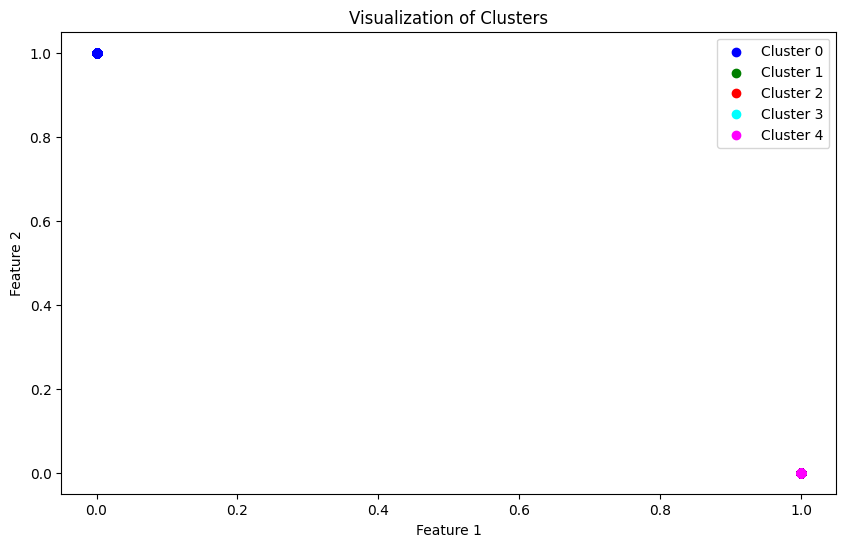

Size of data_scaled: (8804, 530)
Size of clusters: (8804,)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler

# Data preparation for clustering (excluding 'duration')
features_for_clustering = categorical_features + numerical_features
data_for_clustering = column_trans.fit_transform(data[features_for_clustering])

# Scaling the data using MaxAbsScaler
scaler = MaxAbsScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)  # Explicitly set n_init
clusters = kmeans.fit_predict(data_scaled)

data['cluster'] = clusters

# Convert data_scaled from sparse matrix to dense matrix for plotting
data_dense = data_scaled.toarray()

# Visualizing the clusters by plotting each cluster separately
plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # Define colors for each cluster

for i in range(5):  # Assuming 5 clusters
    # Select data points that belong to the current cluster
    points = data_dense[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Clusters')
plt.legend()
plt.show()

print("Size of data_scaled:", data_scaled.shape)
print("Size of clusters:", clusters.shape)


Step 3: Dimensionality Reduction with PCA

Variance explained by each principal component: [0.20320213 0.13855369]


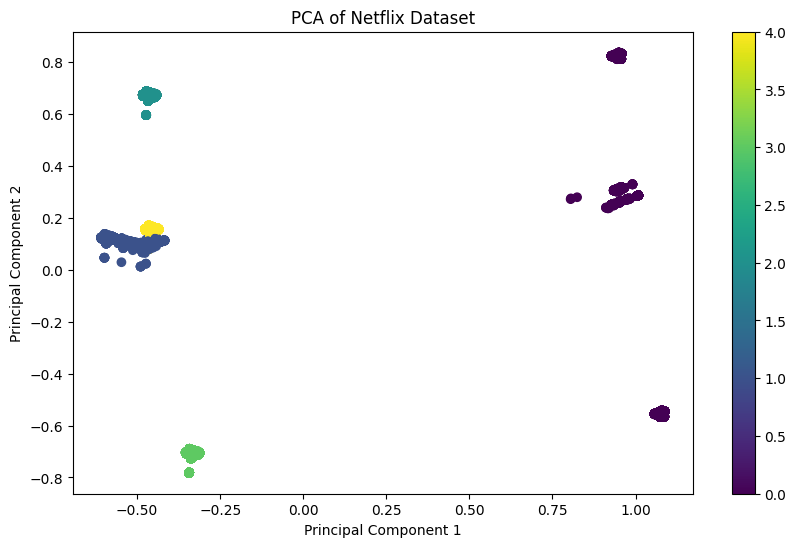

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert data_scaled from sparse matrix to dense matrix for PCA
data_dense = data_scaled.toarray()

# Applying PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
principal_components = pca.fit_transform(data_dense)

# Variance explained by each component
print("Variance explained by each principal component:", pca.explained_variance_ratio_)


plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Netflix Dataset')
plt.colorbar()  # Shows the cluster each point belongs to
plt.show()


